In [33]:
import mplfinance as mpf
import pandas as pd

In [34]:
def plot_candlestick_from_dict(data,title="CandleStick Chart"): 
    df = pd.DataFrame(data)    
    df['Date'] = pd.to_datetime(df['Date'])    
    df.set_index('Date', inplace=True)
    mpf.plot(df, type='candle', style='charles', title=title, ylabel='Price')

import pandas as pd

def is_doji(open_price, high, low, close, doji_size=0.1):
    """
    Check if a candlestick is a Doji pattern
    
    Parameters:
    open_price: Opening price
    high: High price
    low: Low price
    close: Closing price
    doji_size: maximum body size ratio threshold (default 0.1 or 10% of range)
    """
    body_size = abs(close - open_price)
    candle_range = high - low
    
    # Avoid division by zero
    if candle_range == 0:
        return False
        
    # Calculate body size as a ratio of the candle range
    body_ratio = body_size / candle_range
    
    return body_ratio <= doji_size

def standard_doji(open_price, high, low, close, doji_size=0.1, shadow_ratio=0.4):
    """
    Check if a candlestick is a Standard Doji
    Standard Doji has approximately equal upper and lower shadows
    
    Parameters:
    shadow_ratio: acceptable difference between upper and lower shadows (default 0.4 or 40%)
    """
    if not is_doji(open_price, high, low, close, doji_size):
        return False
        
    # Calculate upper and lower shadow lengths
    middle_price = (open_price + close) / 2
    upper_shadow = high - middle_price
    lower_shadow = middle_price - low
    
    # Check if shadows are roughly equal
    if min(upper_shadow, lower_shadow) == 0:
        return False
        
    shadow_difference = abs(upper_shadow - lower_shadow) / max(upper_shadow, lower_shadow)
    
    return shadow_difference <= shadow_ratio

def dragonfly_doji(open_price, high, low, close, doji_size=0.1, shadow_threshold=0.1):
    """
    Check if a candlestick is a Dragonfly Doji
    Dragonfly Doji has a long lower shadow and minimal upper shadow
    
    Parameters:
    shadow_threshold: maximum acceptable upper shadow ratio (default 0.1 or 10% of range)
    """
    if not is_doji(open_price, high, low, close, doji_size):
        return False
        
    candle_range = high - low
    if candle_range == 0:
        return False
        
    # Calculate shadow ratios
    middle_price = (open_price + close) / 2
    upper_shadow_ratio = (high - middle_price) / candle_range
    lower_shadow_ratio = (middle_price - low) / candle_range
    
    # Dragonfly should have minimal upper shadow and significant lower shadow
    return upper_shadow_ratio <= shadow_threshold and lower_shadow_ratio >= (1 - shadow_threshold)

def gravestone_doji(open_price, high, low, close, doji_size=0.1, shadow_threshold=0.1):
    """
    Check if a candlestick is a Gravestone Doji
    Gravestone Doji has a long upper shadow and minimal lower shadow
    
    Parameters:
    shadow_threshold: maximum acceptable lower shadow ratio (default 0.1 or 10% of range)
    """
    if not is_doji(open_price, high, low, close, doji_size):
        return False
        
    candle_range = high - low
    if candle_range == 0:
        return False
        
    # Calculate shadow ratios
    middle_price = (open_price + close) / 2
    upper_shadow_ratio = (high - middle_price) / candle_range
    lower_shadow_ratio = (middle_price - low) / candle_range
    
    # Gravestone should have minimal lower shadow and significant upper shadow
    return lower_shadow_ratio <= shadow_threshold and upper_shadow_ratio >= (1 - shadow_threshold)

# Example usage
def test_doji_patterns():
    """
    Test function to demonstrate usage of Doji detection functions
    """
    # Test cases
    candles = [
        # Standard Doji
        {"open": 100, "high": 105, "low": 95, "close": 100},
        # Dragonfly Doji
        {"open": 100, "high": 100.5, "low": 95, "close": 100},
        # Gravestone Doji
        {"open": 100, "high": 105, "low": 99.5, "close": 100},
        # Not a Doji
        {"open": 100, "high": 105, "low": 95, "close": 103}
    ]
    
    for i, candle in enumerate(candles, 1):
        print(f"\nTesting Candle {i}:")
        print(f"Is Doji: {is_doji(candle['open'], candle['high'], candle['low'], candle['close'])}")
        print(f"Is Standard Doji: {standard_doji(candle['open'], candle['high'], candle['low'], candle['close'])}")
        print(f"Is Dragonfly Doji: {dragonfly_doji(candle['open'], candle['high'], candle['low'], candle['close'])}")
        print(f"Is Gravestone Doji: {gravestone_doji(candle['open'], candle['high'], candle['low'], candle['close'])}")

## Standard Doji

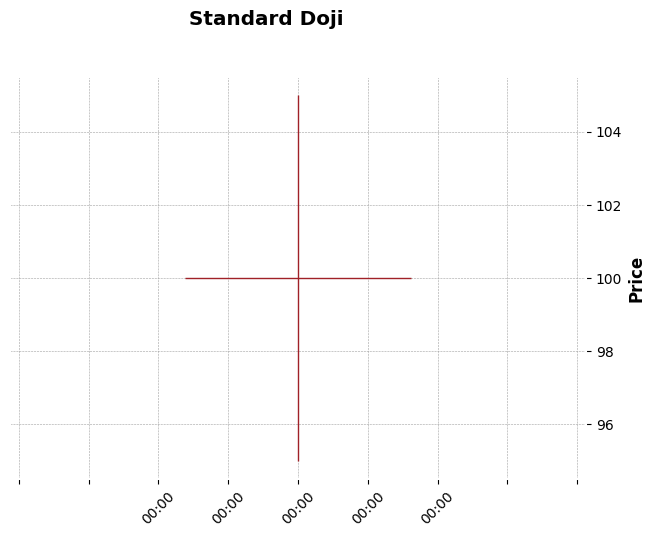

In [35]:

ohlc_data = [
    {"Date":"2024-09-01", "Open":100, "High":105, "Low":95, "Close":100},
]

plot_candlestick_from_dict(ohlc_data,"Standard Doji")

## Dragonfly Doji

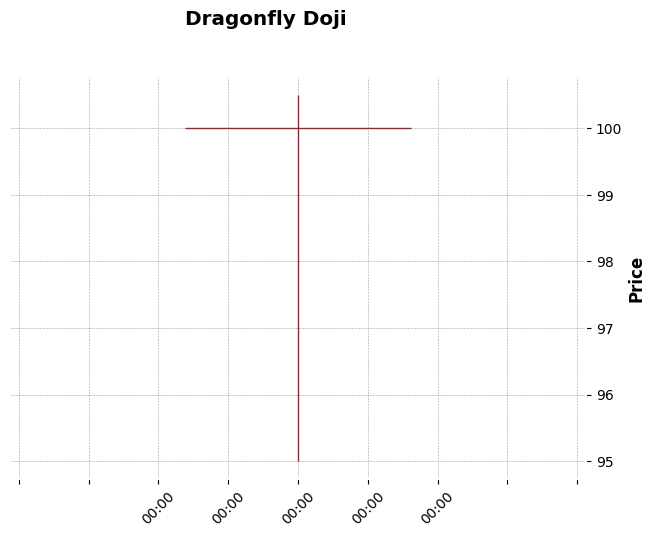

In [36]:
ohlc_data = [
    {"Date":"2024-09-01", "Open":100, "High":100.5, "Low":95, "Close":100},
]
plot_candlestick_from_dict(ohlc_data,"Dragonfly Doji")


## Gravestone Doji

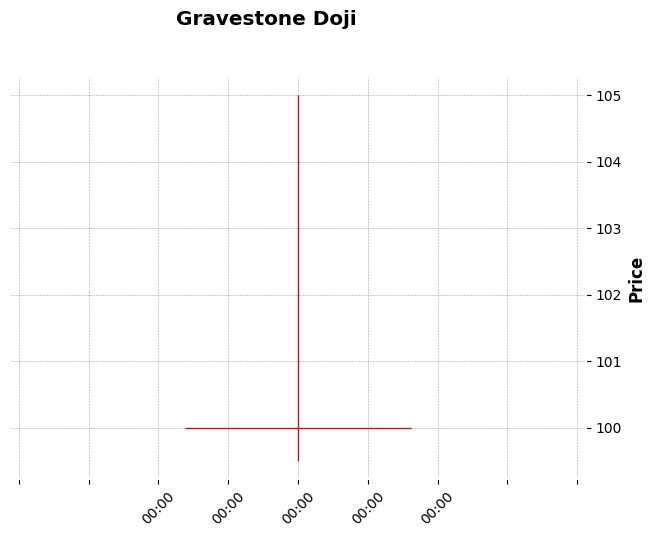

In [37]:
ohlc_data = [
    {"Date":"2024-09-01", "Open":100, "High":105, "Low":99.5, "Close":100},
]

plot_candlestick_from_dict(ohlc_data,"Gravestone Doji")

## Testing Doji Patterns in Python

In [38]:
test_doji_patterns()


Testing Candle 1:
Is Doji: True
Is Standard Doji: True
Is Dragonfly Doji: False
Is Gravestone Doji: False

Testing Candle 2:
Is Doji: True
Is Standard Doji: False
Is Dragonfly Doji: True
Is Gravestone Doji: False

Testing Candle 3:
Is Doji: True
Is Standard Doji: False
Is Dragonfly Doji: False
Is Gravestone Doji: True

Testing Candle 4:
Is Doji: False
Is Standard Doji: False
Is Dragonfly Doji: False
Is Gravestone Doji: False
